# Part I - Prosper Loan Data Exploration
## by Fathma Yusuf

## Introduction

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load csv file to a pandas dataframe

loan_df = pd.read_csv('prosperLoanData.csv')
loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# Check the number of columns and rows in the loaded dataframe

loan_df.shape

(113937, 81)

In [4]:
# Remove the limit to maximum number of columns that can be displayed by pandas

pd.set_option('display.max_columns',None)

In [5]:
# Check if maximum number of columns can all be displayed

loan_df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,NaN,NaN,0,CO,Other,Self-employed,2.0,True,True,NaN,2007-08-26 18:41:46.780000000,640.0,659.0,2001-10-11 00:00:00,5.0,4.0,12.0,1,24.0,3.0,3.0,2.0,472.0,4.0,0.0,0.0,0.0,0.00,1500.0,11.0,0.81,0.0,0.17,"$25,000-49,999",True,3083.333333,E33A3400205839220442E84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,78,19141,9425,2007-09-12 00:00:00,Q3 2007,1F3E3376408759268057EDA,330.43,11396.14,9425.00,1971.14,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,A,7.0,2,CO,Professional,Employed,44.0,False,False,NaN,2014-02-27 08:28:14,680.0,699.0,1996-03-18 00:00:00,14.0,14.0,29.0,13,389.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,3989.0,0.21,10266.0,29.0,1.00,2.0,0.18,"$50,000-74,999",True,6125.000000,9E3B37071505919926B1D82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134815,10000,2014-03-03 00:00:00,Q1 2014,1D13370546739025387B2F4,318.93,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.63,3001.00,1185.63,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.20,4091.09,1052.11,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,D,4.0,2,MN

In [6]:
# Check data types of features of borrowers to be analyzed

loan_df.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

In [7]:
loan_df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

In [8]:
# Change Income Range variable from string to Categorical datatype for accurate analysis

loan_df['IncomeRange'] = loan_df['IncomeRange'].astype('category') 

In [9]:
# Reorder IncomeRange to enable accurate visualizations suitable for ordinal data

loan_df['IncomeRange']=loan_df['IncomeRange'].cat.reorder_categories(['$100,000+','$75,000-99,999','$50,000-74,999', '$25,000-49,999', '$1-24,999' , '$0','Not employed','Not displayed'])

In [10]:
# Check to ensure datatype has successfully been effected

loan_df['IncomeRange']

0         $25,000-49,999
1         $50,000-74,999
2          Not displayed
3         $25,000-49,999
4              $100,000+
5              $100,000+
6         $25,000-49,999
7         $25,000-49,999
8         $25,000-49,999
9         $25,000-49,999
10        $75,000-99,999
11             $1-24,999
12        $25,000-49,999
13        $50,000-74,999
14             $100,000+
15        $50,000-74,999
16        $75,000-99,999
17         Not displayed
18        $75,000-99,999
19        $25,000-49,999
20        $50,000-74,999
21        $25,000-49,999
22             $1-24,999
23        $25,000-49,999
24        $25,000-49,999
25        $75,000-99,999
26        $25,000-49,999
27        $75,000-99,999
28        $25,000-49,999
29             $100,000+
               ...      
113907    $25,000-49,999
113908    $25,000-49,999
113909    $25,000-49,999
113910         $100,000+
113911    $25,000-49,999
113912    $25,000-49,999
113913         $100,000+
113914     Not displayed
113915    $50,000-74,999


In [11]:
# Check the number of previous prosper loans taken up by borrowers previosusly that are null and fill with zero for better analysis

loan_df['TotalProsperLoans'].isnull().sum()

91852

In [12]:
loan_df['TotalProsperLoans'].fillna(0, inplace = True)

In [13]:
loan_df['TotalProsperLoans'].value_counts()

0.0    91853
1.0    15538
2.0     4540
3.0     1447
4.0      417
5.0      104
6.0       29
7.0        8
8.0        1
Name: TotalProsperLoans, dtype: int64

In [14]:
# Check to see if the number of previous prosper loans taken up by borrowers previosusly that are null are now filled

loan_df['TotalProsperLoans'].isnull().sum()

0

In [15]:
# Check values in MonthlyLoanPayment of borrowers

loan_df['MonthlyLoanPayment'].describe()

count    113937.000000
mean        272.475783
std         192.697812
min           0.000000
25%         131.620000
50%         217.740000
75%         371.580000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

In [16]:
# Check values in BorrowerRates

loan_df['BorrowerRate'].describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

In [17]:


loan_df['Occupation'].value_counts()[:12]

Other                       28617
Professional                13628
Computer Programmer          4478
Executive                    4311
Teacher                      3759
Administrative Assistant     3688
Analyst                      3602
Sales - Commission           3446
Accountant/CPA               3233
Clerical                     3164
Sales - Retail               2797
Skilled Labor                2746
Name: Occupation, dtype: int64

### What is the structure of your dataset?

> The Prosper Loan Data has 113937 loan listings with 81 sets of loan information about the listings.

> The dataset is mostly numerical with few categorical columns LoanStatus, Occupation, EmploymentStatus, IsBorrowerHomeowner



### What is/are the main feature(s) of interest in your dataset?

> The dataset variables are 81 which is a large number to breakdown.

> I am mostly interested in finding out the main features that are common in high borrowing rates of loan listings. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The main qualitative variables that I expect to be common in high borrowing rates and that I will be evaluating are: 
>>BorrowerState, Occupation, IncomeRanges.

> The other quatitative features that I will be majorly interested in checking in relation to the ones stated above are:
>> MonthlyLoanPayment(e.g. What is the common monthly payment scheduled for borrowers in high borrowing states?)  
>> Loan Terms(e.g. What is the most common loan term prefered in high borrowing states?)   
>> BorrowerRate(e.g. What are the interest rates that are common in states that have high borrowing rates?)    
>> TotalProsperLoans


# Univariate Exploration 

## Question 1. What are the top 7 states with high borrowing rates from the data and what is the distribution?

In [18]:
#Check value count of borrowing in top 7 states

loan_df['BorrowerState'].value_counts()[:7]

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
Name: BorrowerState, dtype: int64

In [19]:
#create dataframe relating to only the top 7 states with high borrowing rates for analysis

loan_df1 = loan_df[loan_df['BorrowerState'].isin(['CA','TX','NY','FL','IL','GA','OH'])]

In [20]:
loan_df1

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,NaN,NaN,0,GA,Other,Not available,NaN,False,True,783C3371218786870A73D20,2007-01-02 14:09:10.060000000,480.0,499.0,2002-07-27 00:00:00,NaN,NaN,3.0,0,0.0,0.0,1.0,1.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,Not displayed,True,2083.333333,6954337960046817851BCB2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,86,6466,3001,2007-01-17 00:00:00,Q1 2007,5F7033715035555618FA612,123.32,4186.6300,3001.00,1185.6300,-24.20,0.00,0.00,0.00,0.0,1.0000,0,0,0.00,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,A,9.0,16,GA,Skilled Labor,Employed,113.0,True,False,NaN,2012-10-22 11:02:32,800.0,819.0,1983-02-28 00:00:00,5.0,5.0,29.0,7,115.0,0.0,1.0,4.0,10056.0,14.0,0.0,0.0,1444.0,0.04,30754.0,26.0,0.76,0.0,0.15,"$25,000-49,999",True,2875.000000,A0393664465886295619C51,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,16,77296,10000,2012-11-01 00:00:00,Q4 2012,9ADE356069835475068C6D2,321.45,5143.2000,4091.09,1052.1100,-108.01,0.00,0.00,0.00,0.0,1.0000,0,0,0.00,158
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,0.17830,0.0799,0.09840,4.0,C,4.0,2,CA,Laborer,Employed,103.0,False,False,NaN,2013-05-05 06:49:25,700.0,719.0,1999-02-25 00:00:00,6.0,6.0,10.0,5,101.0,3.0,16.0,0.0,0.0,0.0,1.0,0.0,1260.0,0.13,2181.0,10.0,0.80,0.0,0.24,"$25,000-49,999",True,3355.750000,0C87368108902149313D53B,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,10,90051,10000,2013-05-13 00:00:00,Q2 2013,737F347089545035681C074,372.60,3353.4000,1955.89,1397.5100,-69.21,0.00,0.00,0.00,0.0,1.0000,0,0,0.00,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,0.05221,0.0099,0.04231,7.0,AA,9.0,7,IL,Food Service,Employed,269.0,True,False,NaN,2013-12-02 10:43:39,820.0,839.0,1993-04-01 00:00:00,17.0,16.0,32.0,12,219.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,9906.0,0.11,77696.0,29.0,1.00,1.0,0.25,"$25,000-49,999",True,3333.333333,02163700809231365A56A1C,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,3,121268,10000,2013-12-12 00:00:00,Q4 2013,49A53699682291323D04D66,305.54,611.0800,505.58,105.5000,-16.77,0.00,0.00,0.00,0.0,1.0000,0,0,0.00,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529

In [21]:
#Check to see if new dataset only has 7 uniques states with high borrowing rates

loan_df1['BorrowerState'].value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
Name: BorrowerState, dtype: int64

Text(0,0.5,'Borrower States Count')

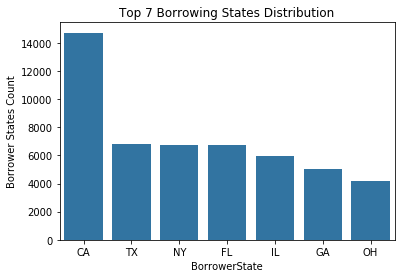

In [22]:
#Plot bar chart to show the distribution of borrowing rates in the 7 different states

ordered_states = loan_df1['BorrowerState'].value_counts().index
color1 = sb.color_palette()[0]

sb.countplot(data = loan_df1, x = 'BorrowerState', color = color1, order=ordered_states);
plt.title('Top 7 Borrowing States Distribution')
plt.ylabel('Borrower States Count')

### Observation 1

From the bar plot, CA(California) State has the highest distribution out of the 7 high borrowing rate states by a large margin. This prompts more analysis on CA borrowers and their features as compared to the other top 7 states

## Question 2. What is the distribution of the loan terms of the 7 highest borrowing states?



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

In [23]:
# Check min and maximum properties of Terms for highest borrowing states

loan_df1['Term'].describe()

count    50134.000000
mean        40.705788
std         10.474154
min         12.000000
25%         36.000000
50%         36.000000
75%         36.000000
max         60.000000
Name: Term, dtype: float64

Text(0,0.5,'Borrower Count')

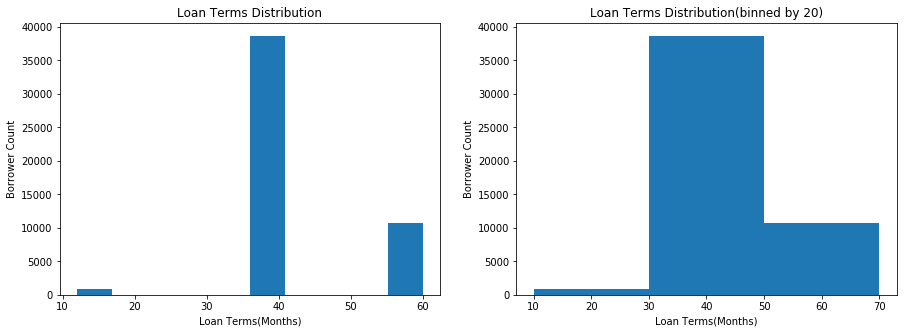

In [24]:
# Plot distribution to show the range of popular loan terms for high borrowing states

bins = np.arange(10, loan_df1['Term'].max()+20,20)
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.hist(data = loan_df1, x = 'Term');
plt.title('Loan Terms Distribution')
plt.xlabel('Loan Terms(Months)')
plt.ylabel('Borrower Count') 

plt.subplot(1,2,2)
plt.hist(data = loan_df1, x = 'Term', bins=bins);
plt.title('Loan Terms Distribution(binned by 20)')
plt.xlabel('Loan Terms(Months)')
plt.ylabel('Borrower Count') 

In [25]:
#Evaluate the categories of loan terms selected by borrowers
#Order the categories from highest loan term in value conunts to lowest

sorted_terms = loan_df1['Term'].value_counts()
ordered_terms = loan_df1['Term'].value_counts().index

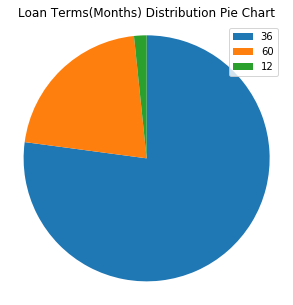

In [26]:
#plot pie chart to show the general distribution of loan terms

plt.figure(figsize=[20,5]) 
labels = ordered_terms

plt.pie(sorted_terms, startangle=90, counterclock=False);
plt.legend(labels, loc='best');
plt.axis('square'); 
plt.title('Loan Terms(Months) Distribution Pie Chart');

### Observation 2
The histogram plot shows that the loan terms are symmetrically skewed with the highest distribution being a loan term that is between 30 and 50 months

The Pie chart plot narrows down the observation that the most common/popular loan term taken by borrowers from the 7 highest borrowing states is 36 months 

## Question 3. What is the distribution of Income ranges of the highest borrowing states?

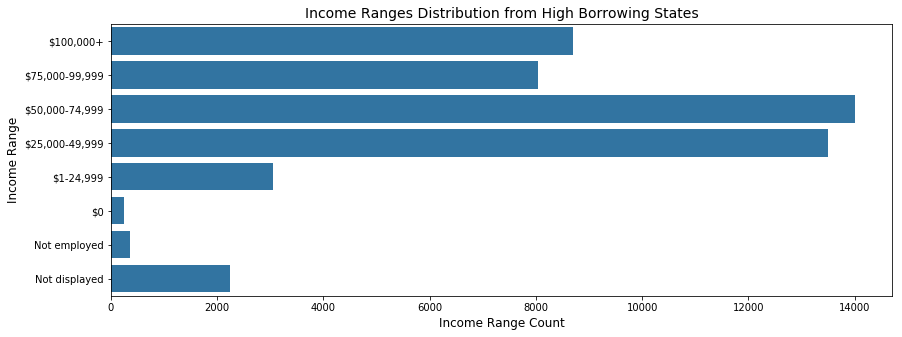

In [27]:
# Plot distribution to show the ranges of income for high borrowing states as stated by borrowers

plt.figure(figsize=[14,5]) 

sb.countplot(data=loan_df1, y= 'IncomeRange', color = color1);
plt.title('Income Ranges Distribution from High Borrowing States', fontsize=14);
plt.xlabel('Income Range Count', fontsize=12);
plt.ylabel('Income Range', fontsize=12);

### Observation 3
The income range distribution bar chart plot shows that the highest income range selected by borrowers is between 50,000-74,999 US Dollars, followed closely by the range 25,000-49,999 US Dollars. The distribution generally shows that borrowers selected their income ranges from 25,000 to 100,000 US Dollars on a larger scale of the distribution.

The distribution is also indicating that borrowers with 0 US Dollars income range have the least borrowing rates from the bunch displayed.

## Question 4. Did borrowers from 7 highest borrowing states have previous loans and what does the distribution look like?

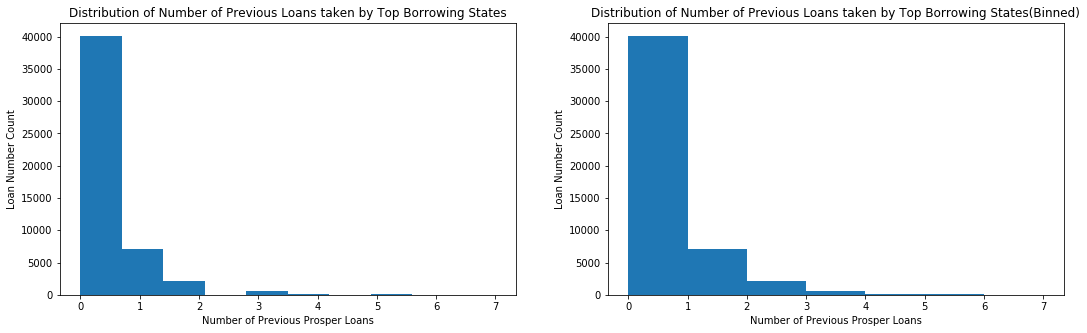

In [28]:
# Plot distribution to show the number previous prosper loans taken by high borrowing state borrowers
bins2 = np.arange(0, loan_df1['TotalProsperLoans'].max()+1,1)
plt.figure(figsize=[18,5])

plt.subplot(1,2,1)
plt.hist(data = loan_df1, x = 'TotalProsperLoans');
plt.title('Distribution of Number of Previous Loans taken by Top Borrowing States')
plt.xlabel('Number of Previous Prosper Loans');
plt.ylabel('Loan Number Count');

plt.subplot(1,2,2)
plt.hist(data = loan_df1, x = 'TotalProsperLoans', bins = bins2);
plt.title('Distribution of Number of Previous Loans taken by Top Borrowing States(Binned)')
plt.xlabel('Number of Previous Prosper Loans');
plt.ylabel('Loan Number Count');

### Observation 4
From the binned histogram of previous prosper loan counts taken by high borrowing state borrowers, the distribution shows that the majority of borrowers listed at prosper loans did not have any previous loan listings. 

The distribution is skewed to the right with the low length bars carrying the larger part of the distribution itself.

## Question 5. What is the distribution of monthly loan payments made by borrowers from the top 7 borrowing states?

In [29]:
loan_df1['MonthlyLoanPayment'].describe()

count    50134.000000
mean       284.173521
std        197.389528
min          0.000000
25%        139.020000
50%        232.055000
75%        383.350000
max       2218.530000
Name: MonthlyLoanPayment, dtype: float64

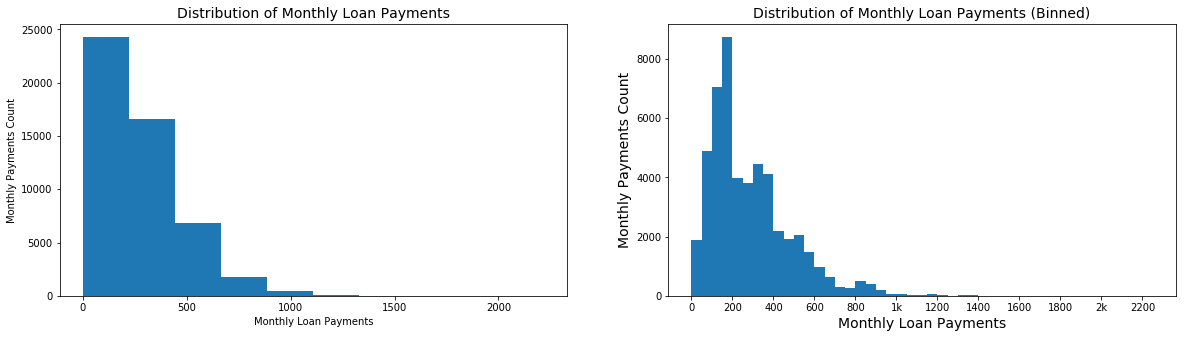

In [30]:
# Plot histogram to show distribution of monthy loan payments made by borrowers fro top 7 borrowing states

bins3 = np.arange(0, loan_df1['MonthlyLoanPayment'].max()+50,50)
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
plt.hist(data = loan_df1, x = 'MonthlyLoanPayment');
plt.title('Distribution of Monthly Loan Payments', fontsize=14)
plt.xlabel('Monthly Loan Payments');
plt.ylabel('Monthly Payments Count'); 

plt.subplot(1,2,2)
plt.hist(data = loan_df1, x = 'MonthlyLoanPayment', bins = bins3);
plt.xticks([0, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000, 2200], [0, 200, 400, 600, 800, '1k', 1200, 1400, 1600, 1800, '2k', 2200])
plt.title('Distribution of Monthly Loan Payments (Binned)', fontsize=14)
plt.xlabel('Monthly Loan Payments', fontsize=14);
plt.ylabel('Monthly Payments Count', fontsize=14);

### Observation 5
From the binned distribution plotted, observed is that the distribution is more rightly skewed with the values of monthly payments reducing as the values increase. 

The distribution also shows that the highest payments made monthly are between 150 to 200 US Dollars by borrowers from the top 7 borrowing states and the higher the monthly payment, the lower the number of borrowers making them.

## Question 6. What are the common occupations listed under the highest borrowing state(CA)?

In [31]:
# Narrow down dataframe to capture borrower features of CA state borrowers only

ca_df = loan_df[loan_df['BorrowerState'].isin(['CA'])]

In [32]:
# Check to see that the data is narrowed down to only CA state borrowers

ca_df['BorrowerState'].value_counts()

CA    14717
Name: BorrowerState, dtype: int64

In [33]:
# Check the top 12 occupations listing of borrowers from CA state

ca_df['Occupation'].value_counts()[:12]

Other                       3744
Professional                1771
Executive                    648
Computer Programmer          643
Administrative Assistant     569
Sales - Commission           480
Analyst                      476
Teacher                      461
Accountant/CPA               447
Clerical                     412
Sales - Retail               391
Nurse (RN)                   351
Name: Occupation, dtype: int64

In [34]:
# Narrow down CA dataframe to capture borrower features of 12 top occupations of borrowers in CA

ca_df1 = ca_df[ca_df['Occupation'].isin(['Other','Professional','Executive','Computer Programmer','Administrative Assistant','Sales - Commission','Analyst','Teacher','Accountant/CPA','Clerical','Sales - Retail','Nurse (RN)'])]

In [35]:
#Order the occupations for creation of a more accurately readable plot

ordered_occupations = ca_df1['Occupation'].value_counts().index

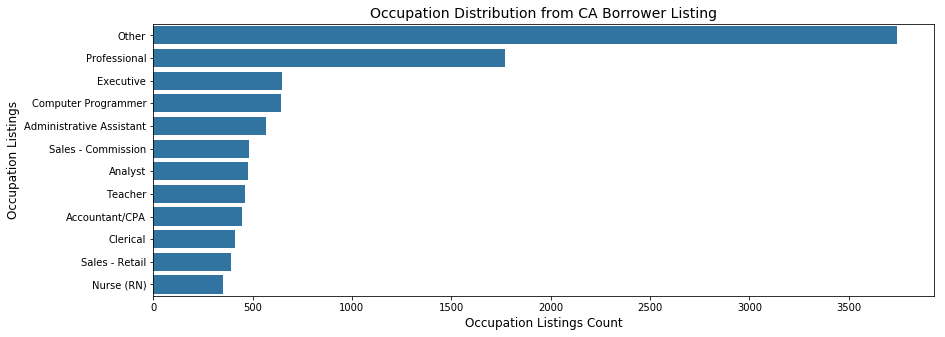

In [36]:
# Plotbar chart to show distribution of the top 12 occupations in CA state

plt.figure(figsize=[14,5])

sb.countplot(data = ca_df1, y = 'Occupation', color = color1, order=ordered_occupations);
plt.title('Occupation Distribution from CA Borrower Listing', fontsize=14);
plt.xlabel('Occupation Listings Count', fontsize=12);
plt.ylabel('Occupation Listings', fontsize=12);

## Observation 6
From the bar plot, the most selected occupation from CA borrower listings is 'Other' while the second most selected occupation being 'Professional'

The distribution of CA borrowers' occupations shows that among the top 12 are two sales occupations, Commission sales and Retail sales which I found quite interesting

## Question 7. What is the Interest rate of loans taken up by borrowers from the highest borrowing state(CA)?

In [37]:
ca_df['BorrowerRate'].describe()

count    14717.000000
mean         0.192266
std          0.075499
min          0.000000
25%          0.131400
50%          0.182900
75%          0.251100
max          0.360000
Name: BorrowerRate, dtype: float64

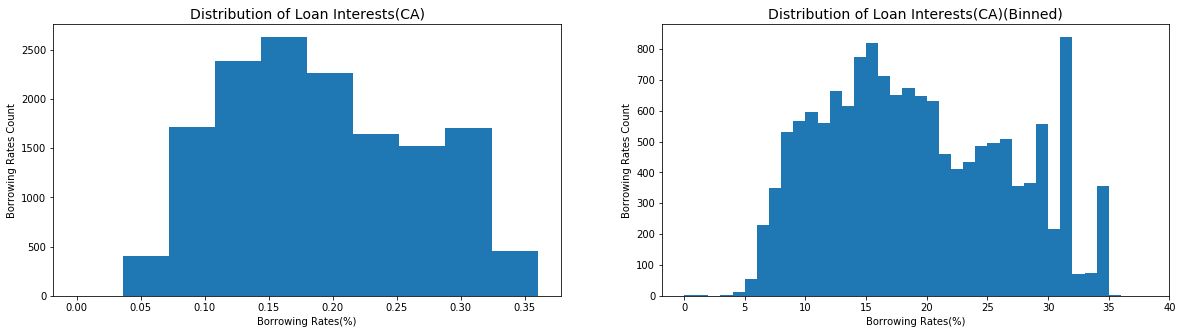

In [38]:
#Plot histogram to show the distribution of loan interest rates from CA state borrowers

bins4 = np.arange(0, loan_df1['BorrowerRate'].max()+0.01,0.01)
plt.figure(figsize=[20,5])

plt.subplot(1,2,1)
plt.hist(data = ca_df, x = 'BorrowerRate');
plt.title('Distribution of Loan Interests(CA)', fontsize=14)
plt.xlabel('Borrowing Rates(%)')
plt.ylabel('Borrowing Rates Count');

plt.subplot(1,2,2)
plt.hist(data = ca_df, x = 'BorrowerRate', bins = bins4);
plt.xticks([0.00, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40], [0, 5, 10, 15, 20, 25, 30, 35, 40])
plt.title('Distribution of Loan Interests(CA)(Binned)', fontsize=14)
plt.xlabel('Borrowing Rates(%)')
plt.ylabel('Borrowing Rates Count');

### Observation 7

From the binned distribution, observed is that the distribution is skewed more to the left than it is to the right. The interest rate that is mostly given to borrowers in CA state stands at 32% and the rest of the distribution is maintained between 7% and 31% 

This is quite interesting as the rates seem to have quite a large range of difference which we will get to explore further with other variables to understand how they affect/relate to them

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Explored were variables that were both a mix of qualitative and quantitative nature. Qualitative features did not require transformations to explore their distributions. One ordinal variable(Income ranges), was plotted as such and was not considered numerical nor nominal in it's exploration.
>>The qualitative features explored were: BorrowerState, Occupation, IncomeRanges.

> As for the quantitative variables explored, there was no need for any transformations to be made and there were no unusual points observed.
>>The quantitative features explored were: MonthlyLoanPayment, Loan Terms, BorrowerRate, TotalProsperLoans


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> From the varibales explored, the quantitave types (i.e. monthly payments and interest rates) were not pulling any unusual distributions nor did they have any outliers that needed to be churned out for further changes to be made to the data. 

> The data was explored in chunks according to states to enable for easier and more accurate visualizations to show findings of specific intent as the data was quite large and had a lot of variables present of which I selected only 

# Bivariate Exploration

## Question 1. What is the distribution of monthly loan payments in the different income range categories of the top 7 borrowing states?

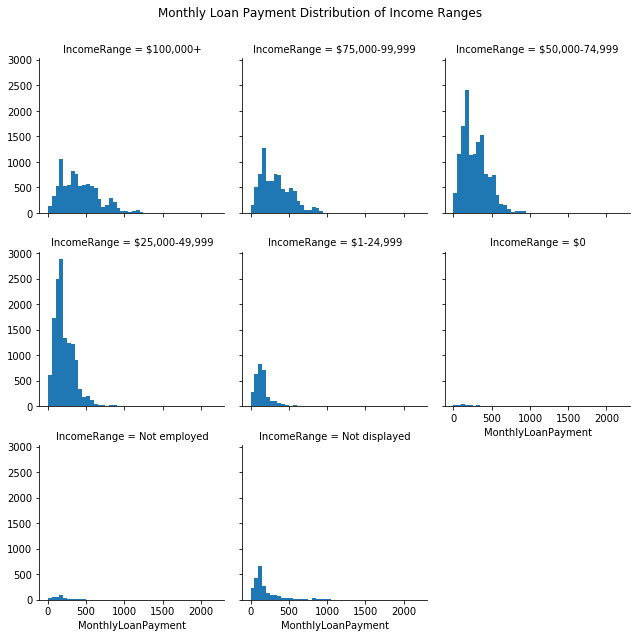

In [39]:
#Plot facet grid to show case the distribution of monthly loan payments in the different income range categories

bins5 = np.arange(0, 2200+50, 50)

facet = sb.FacetGrid(data=loan_df1, col='IncomeRange', col_wrap=3);
facet.map(plt.hist, 'MonthlyLoanPayment', bins=bins5);

facet.fig.subplots_adjust(top=0.9);
facet.fig.suptitle('Monthly Loan Payment Distribution of Income Ranges');

### Observation 1
The distributions show an interesting distribution between the monthly payments made by borrowers from the top 7 borrowing states with majority of them being rightly skewed.

Borrowers in the income range of '25,000-49,999 US Dollars' managed to garner the highest number of monthly payment i.e. above 2500 made, highest of all the other income range categories. The lowest number of monthly payments made on the other hand are shown to be from the '0 US Dollars' and 'Not employed' category of borrowers.

From the plots, the higher the monthly payment, the lower the number of payments made with all categories maintaining majority of monthly payments at between 0 to 1000 US Dollars i.e below 1000 US Dollars

## Question 2. What is the correlation between the borrower rate(i.e. loan interest rate) of  borrowers in CA(Highest borrowing state) with monthly payment, loan terms taken and number of prosper loans taken before?

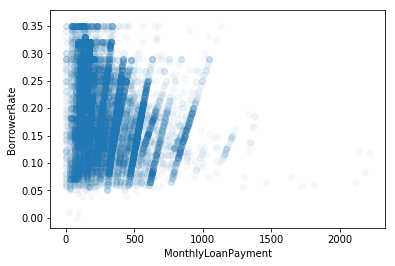

In [40]:
#Plot CA dataframe scatterplots to show case the correlation between the borrower rate(i.e. loan interest rate) of borrowers in CA(Highest borrowing state) with loan terms taken and number of prosper loans taken before

sb.regplot(data=ca_df, x='MonthlyLoanPayment',y='BorrowerRate', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/30}, fit_reg=False);

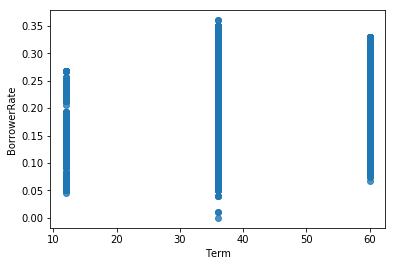

In [41]:
# Make use of def function to show the rest of the correlation using scatter plots
# Plot correlation between interest rate and loan terms taken up by borrowers in CA state

def regplot(arg):
    sb.regplot(data=ca_df, x=arg, y='BorrowerRate', fit_reg=False);
    
regplot('Term')

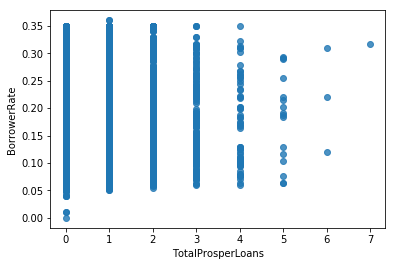

In [42]:
# Plot correlation between interest rate and total prosper loans taken up by borrowers in CA state

regplot('TotalProsperLoans')

### Observation 2
The subplots show there is little to no correlation between interest rate of loans and the loan terms and number of previous loans taken by borrowers in CA state. Which is quite suprising as these were features that I suspected would affect the interests held in loans.

There is a slight negative correlation between borrowing rates and monthly payments as compared to the rest of the plots

## Question 3. What is the relationship between the monthly payments of borrowers from the top 7 states and their income range category?

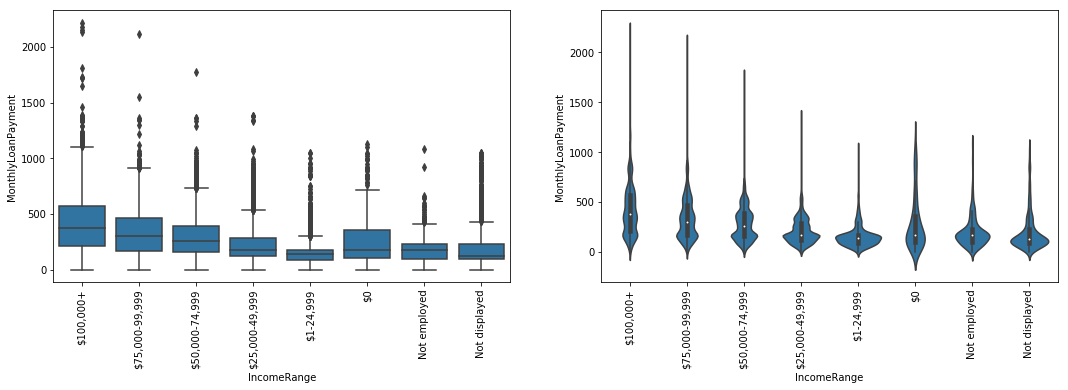

In [43]:
#Plot violinplots along boxplots to visualize the realtionship between the monthly payments of borrowers from the top 7 states and their income range category

plt.figure(figsize=[18,5])

plt.subplot(1,2,1)
sb.boxplot(data=loan_df1, x='IncomeRange', y='MonthlyLoanPayment', color=color1);
plt.xticks(rotation=90);

plt.subplot(1,2,2)
sb.violinplot(data=loan_df1, x='IncomeRange', y='MonthlyLoanPayment', color=color1);
plt.xticks(rotation=90);

### Observation 3.
From the boxplot, observed is that monthly payments have quite an interesting relationship with income range category of borrowers with in CA state. The highest category, '100,000+' seems to be the on the higher side of monthly payments and contribute more than the rest of the categories as they seem to have higher quartiles and mean. The lower categories seem to have the opposite of this and this declines the lower you go in the category.

The violing plots affirm this observation though they depict that a higher number of payments are generally made in the '1-49,999' than in the '100,000' category

## Question 4. What is the correlation between interest rates and the different top 7 borrowing states?

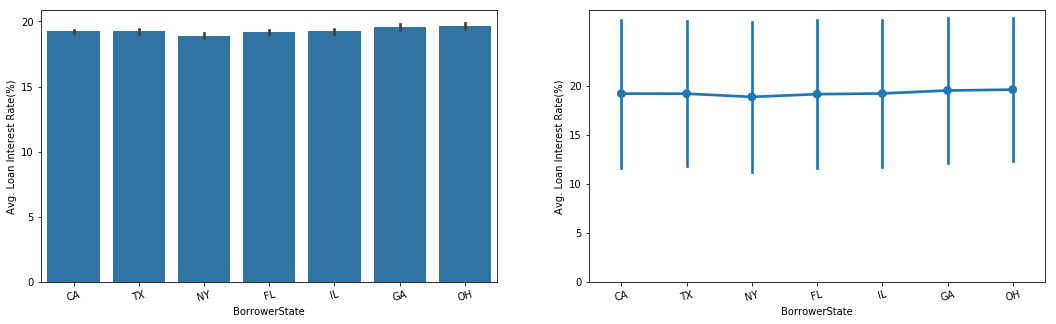

In [44]:
plt.figure(figsize=[18,5])

plt.subplot(1,2,1)
sb.barplot(data=loan_df1, x='BorrowerState', y='BorrowerRate', color = color1, order=ordered_states)
plt.yticks([0.00, 0.05, 0.10, 0.15, 0.20], [0, 5, 10, 15, 20]);
plt.xticks(rotation=15);
plt.ylabel('Avg. Loan Interest Rate(%)');

plt.subplot(1,2,2)
sb.pointplot(data=loan_df1, x='BorrowerState', y='BorrowerRate', color = color1, order=ordered_states, ci='sd')
plt.yticks([0.00, 0.05, 0.10, 0.15, 0.20], [0, 5, 10, 15, 20]);
plt.xticks(rotation=15);
plt.ylabel('Avg. Loan Interest Rate(%)');

### Observation 4.
The plots show that there is relatively common range of interest rates in the top 7 borrowing states with very small differences between them

## Question 5. What is the correlation between monthly loan payments and loan interest rates of borrowers within the top 7 borrowing states

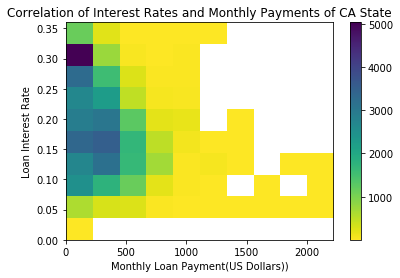

In [45]:
#Plot heatmap to show correlation between monthly loan payments and borrowing rates of borrowers within CA state

plt.hist2d(data = loan_df1, x='MonthlyLoanPayment', y='BorrowerRate', cmin=0.3, cmap='viridis_r')
plt.colorbar()
plt.xlabel('Monthly Loan Payment(US Dollars))')
plt.ylabel('Loan Interest Rate');
plt.title('Correlation of Interest Rates and Monthly Payments of CA State');

### Observation 5.
From the plot, observed is that the highest monthly payment range had the highest interest rate from the top 7 borrowing states. The correlation looks more visually clear than in the scatter plots previously displayed and shows a negative correlation with lower monthly payments displaying higher interest rates. 

The visual also affirms the findings seen on CA state as it is similar

## Question 6. What is the relationship and trend between the top 12 occupations listed and monthly payments made in the top 7 borrowing states?

In [46]:
#check top 12 Occupations in the top 7 borrowing states

loan_df1['Occupation'].value_counts()[:12]

Other                       12496
Professional                 6129
Executive                    2083
Computer Programmer          1984
Teacher                      1759
Administrative Assistant     1731
Analyst                      1682
Sales - Commission           1565
Accountant/CPA               1523
Clerical                     1358
Sales - Retail               1294
Nurse (RN)                   1164
Name: Occupation, dtype: int64

In [47]:
# Narrow down dataframe to capture only the occupations listed above

loan_df3= loan_df1[loan_df1['Occupation'].isin(['Other','Professional', 'Executive','Computer Programmer','Teacher','Administrative Assistant','Analyst','Sales - Commission','Accountant/CPA','Clerical','Sales - Retail','Nurse (RN)'])]

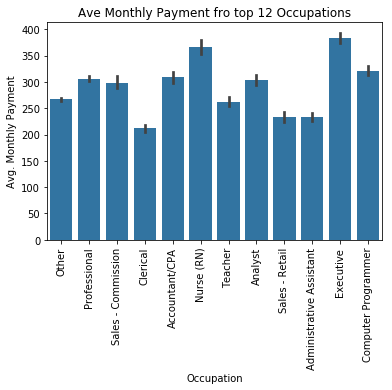

In [48]:
#Plot barplots to visualize the relationship and trend between the top 12 occupations listed and monthly payments made in the top 7 borrowing states

sb.barplot(data = loan_df3, x='Occupation', y='MonthlyLoanPayment', color = color1);
plt.xticks(rotation=15);
plt.ylabel('Avg. Monthly Payment');
plt.xticks(rotation=90);
plt.title('Ave Monthly Payment fro top 12 Occupations');

### Observation 6.
Observed is that in the top 7 borrowing states, monthly payments vary with different occupations listed by borrowers. 

The highest occupations listed with the highest monthly payments are Nurses(RNs) followed by Executives, while the least monthly payments are observed to be made by Clerical and Sales-Retail occupation listings. This can be further investigated by checking out how a sample of different individual states vary on this

## Question 7. What is the correlation between the loan status and loan term of borrowers in the top 7 borrower states?

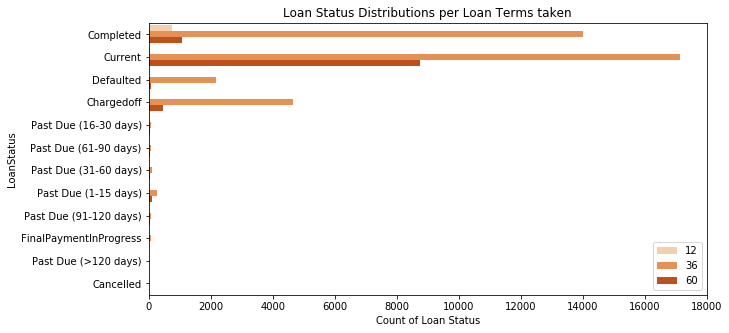

In [49]:
# Plot clustered bar chart to visualize the correlation between the loan status and loan terms of borrowers in the top 7 borrower states?
plt.figure(figsize=[10,5])

plot = sb.countplot(data=loan_df1, y='LoanStatus', hue='Term', palette = 'Oranges');
plot.legend(loc=4)
plt.xlabel('Count of Loan Status');
plt.xticks(rotation=0);
plt.title('Loan Status Distributions per Loan Terms taken');

### Observation 7.
From the plot, observed is that the common loan term selected by borrowers from the top 7 states is 36 months with current loan status being the majority and completed loans coming in as a relatively close second loan status(Interestingly, this is across all loan terms).

We have a low outcome of overdue(1-120 days past due) and cancelled payments which is interesting as there is a turnout of defaulted payments between 0 and 3000 for the 36 months term borrowers

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There was an interesting relationship between monthly payments and income ranges of borrowers in the top 7 borrowing states where borrowers in the income range of '25,000-49,999 US Dollars' managed to garner the highest number of monthly payment i.e. above 2500 made, highest of all the other income range categories which was interesting as I was anticipating the highest income range of 100,000+ to take up that title of highest number of payments.

> An interesting relationship observed as well was there is little to no correlation between interest rate of loans and the loan terms and number of previous loans taken by borrowers in CA state. A slight negative correlation between borrowing rates and monthly payments as compared to the rest of the features was an interesting take away from the relationship investigation.

> Another interesting relationship observed was executives and nurses had the highest average monthly payments than any of the other occupations, which was intriguing as I was expecting an analyst to be among the top payers!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I took a look at the currents status of loans according to loan terms taken by borrowers to see if the loan terms had any effect on the status i.e. the clearing rate of borrowers. Interestingly, 36 months term borrowers had a higher rate of defaulters any other term and compliments the obvservation that it was the most commonly taken up term by borrowers in the top 7 borrowing states.

# Multivariate Exploration

## Question 1. What is the correlation of the interest rates of the loan terms of CA State borrowers according to their monthly payments?

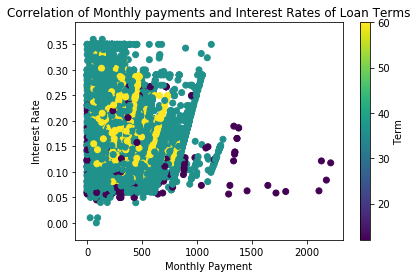

In [50]:
# Plot color encoded scatter plot to showcase the distribution of loan terms in monthly payments and borrower interest rates

plt.scatter(data=ca_df, x='MonthlyLoanPayment',y='BorrowerRate', c = 'Term');
plt.colorbar(label = 'Term');
plt.xlabel('Monthly Payment');
plt.ylabel('Interest Rate');
plt.title('Correlation of Monthly payments and Interest Rates of Loan Terms');

### Observation 1.
The 12 month term showcased in the plots shows is evenly distributed in the monthly payment scale but seems to be more concentrated in the lower interest rates as compared to the other higher loan terms.

The 36 month terms is heavily distributed in mohtly payments below 1400 and has distribution across the interest rates with no concentration of specific rates in particular. From the plot, it is the most occuring term than any of the other terms selected by borrowers.

The 60 month term seems to be less is distribution like the 12 month term and has more concentration in monthly payments less than 1000 and borrowing rates between 5 and 35 percent

## Question 2. What is the distribution of monthly payments for each of the top 7 borrowing states according to loan terms listed?

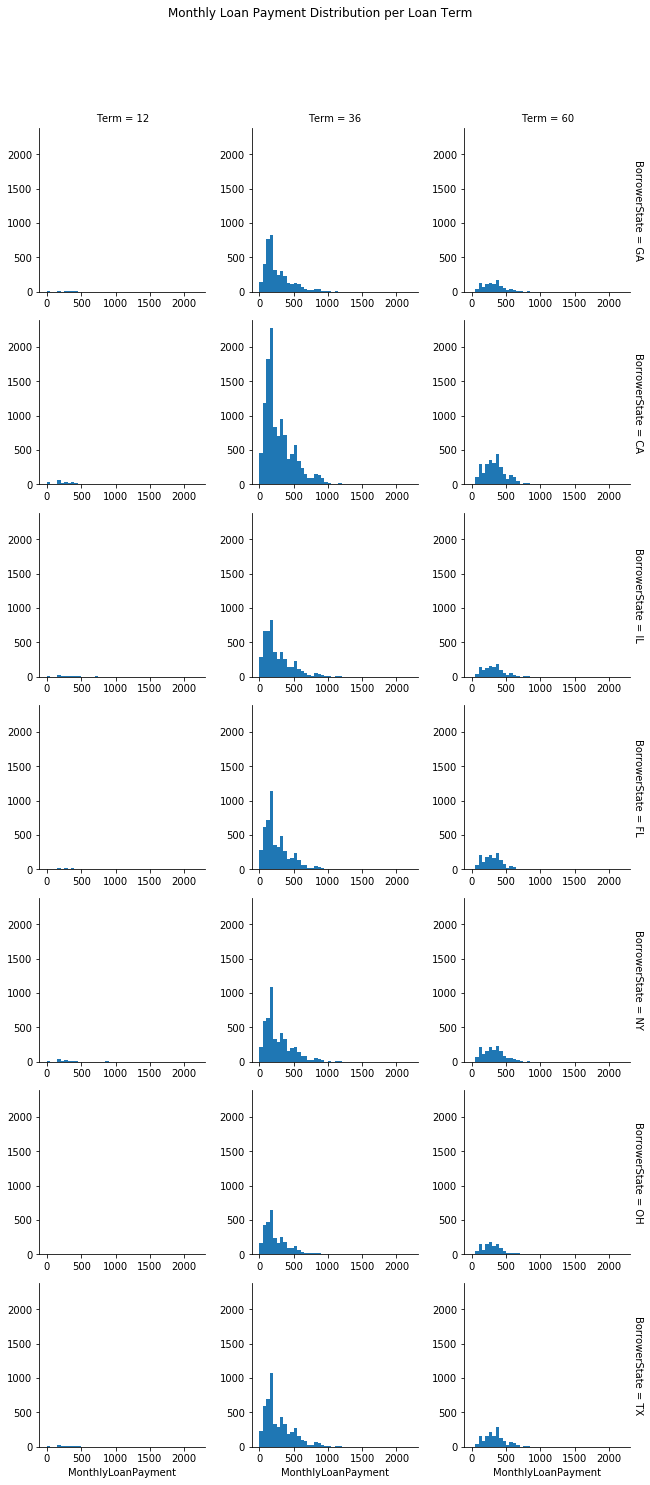

In [57]:
# Plot facet grid to show the distribution of monthly payments for each of the top 7 borrowing states according to loan terms listed

bins5 = np.arange(0, 2200+50, 50)

facet = sb.FacetGrid(data=loan_df1, col='Term', row = 'BorrowerState', margin_titles = True);
facet.map(plt.hist, 'MonthlyLoanPayment', bins=bins5);

facet.fig.subplots_adjust(top=0.9)
facet.fig.suptitle('Monthly Loan Payment Distribution per Loan Term');

### Observation 2.
Observed is that the top 7 borrowing states have a few things in common i.e. High borrowing rates are found within the 36 month term under which high numbers of monthly payments are made by borrowers while the least common term is the 12 month term which results in very low monthly payments

CA state, which has the highest number of borrower listings than any of the other states, has the highest loan payments overall that is observed from the distributions themselves and this is seen across all terms. Which I found to be very conclusive from all previous observations

## Question 3. What is the distribution of the top 3 borrowing states according to the top 12 occupations listed and the average monthly payments contributed?
This is to further investigate the topr three states only and avoid overplotting

In [52]:
# Breakdown top 12 occupations dataframe to have only the top 3 borrowing states

loan_df3 = loan_df3[loan_df3['BorrowerState'].isin(['CA','TX','NY'])]

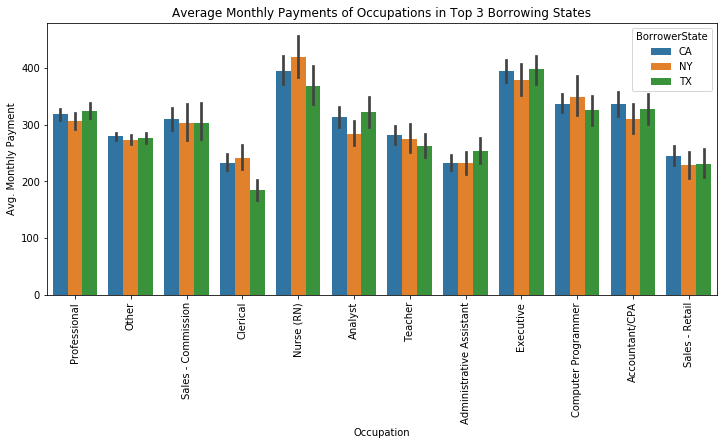

In [53]:
#Plot bars to show the distribution of the top 3 borrowing states according to their occupation listings and average monthly payments
plt.figure(figsize = [12,5])

sb.barplot(data = loan_df3, x='Occupation', y='MonthlyLoanPayment', hue = 'BorrowerState');
plt.xticks(rotation=15);
plt.ylabel('Avg. Monthly Payment');
plt.xticks(rotation=90);
plt.title('Average Monthly Payments of Occupations in Top 3 Borrowing States');

### Observation 3. 
From the plot, we see that the comparison between the different occupation listings from the top 3 borrowing states vary and show that different occupations from different states have varying monthly payment averages.

From a the previous bivariate plot, we saw that Nurses had the higest rate of monthly payment followed by Executives and this still stands for each of the individual top three states(CA,NY,TX) with NY having the highest for nurses and TX having a slight lead on the Executives.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Observations in the plots were quite affirming and gave more insight into indivual aspect of high borrowing states and their features which were my main investigative purposes. 

> The most common loan term that was taken up by high borrowing state borrowers was the most taken up term in all states and had the most monthly payments bieing made. CA being the top most borrowing state, the observation strengthened and manifested in CA having these traits

> The correlation of monthly payments and interest rates seemed to also have slight effect on loan terms as the 12month term seemed to have a higher concentration of lower interest rates compared to other terms and this was very interesting to observe since this was the lease selected term

> Different occupations showcased different distributions of monthly payment in different states but Nurses and Executives held the title of top paying occupations out the 12 top monthly paying occupations in the 7 top borrowing states from the plots

### Were there any interesting or surprising interactions between features?

> The interactions were more affirming than surprising which made my investigations worthwhile

## Conclusions
> The data was very interesting to explore as I managed to get conclusive observations on the features of high borrowers and the relationship and interaction of these features
